# Data Diri
* Nama : Rizal Mujahiddan
* Email : rizal.mujahiddan@gmail.com
* ID Dicoding : rizal_mujahiddan69


# Start Time
* I Must import time for check time

In [1]:
import time
start_time = time.time()

# Import Libraries

In [2]:
from google.colab import drive, files
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import zipfile

# Specify the path to the zip file
zip_file_path = '/content/drive/MyDrive/dicoding/rockpaperscissors.zip'

# Specify the directory where you want to extract the contents
extracted_folder_path = '/content'

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents to the specified directory
    zip_ref.extractall(extracted_folder_path)

print(f"Successfully extracted files to {extracted_folder_path}")

Successfully extracted files to /content


In [4]:
# !unzip -q '/content/drive/MyDrive/dicoding/rockpaperscissors.zip' -d '/content' # Terminal Linux for unzip

In [5]:
import shutil
import os

def move_folder_recursive(source_path, destination_path):
    try:
        # Move the folder recursively to the new destination
        shutil.move(source_path, destination_path)
        print(f"Successfully moved '{source_path}' to '{destination_path}'")
    except Exception as e:
        print(f"Error: {e}")

# Example usage
source_folder_path = '/content/rockpaperscissors/rps-cv-images'
destination_folder_path = '/content/rps-cv-images'

move_folder_recursive(source_folder_path, destination_folder_path)


Successfully moved '/content/rockpaperscissors/rps-cv-images' to '/content/rps-cv-images'


In [6]:
# !mv /content/rockpaperscissors/rps-cv-images /content/rps-cv-images # Terminal Linux for Cut

In [7]:
import tensorflow

from keras.preprocessing import image

from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import tensorflow as tf

%matplotlib inline

# Addtional Functions

In [8]:
def seconds2string(seconds):
    # Ensure the input is a positive number
    if seconds < 0:
        raise ValueError("Input seconds must be a non-negative number.")

    # Calculate hours, minutes, and remaining seconds
    hours, remainder = divmod(seconds, 3600)
    minutes, seconds = divmod(remainder, 60)

    # Build the string representation
    time_string = ""
    if hours:
        time_string += f"{int(hours)} hours "
    if minutes:
        time_string += f"{int(minutes)} minutes "
    if seconds:
        time_string += f"{int(seconds)} seconds"

    return time_string.strip()

# Load Data

In [9]:
batch_size = 64
img_height, img_width = 224,224

# train_ds = tf.keras.utils.image_dataset_from_directory(
#     '/content/rockpaperscissors',
#     subset='training',
#     validation_split=0.4,
#     seed=42,
#     image_size=(img_height, img_width),
#     batch_size=batch_size
# )

# val_ds = tf.keras.utils.image_dataset_from_directory(
#     '/content/rockpaperscissors',
#     subset='validation',
#     validation_split=0.4,
#     seed=42,
#     image_size=(img_height, img_width),
#     batch_size=batch_size
# )

# Preprocessing & Augmentation Data

In [10]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    vertical_flip=True,
                    shear_range = 0.2,
                    channel_shift_range=0.2,
                    zoom_range=0.2,
                    fill_mode = 'nearest',
                    validation_split=0.4,
                    )

validation_datagen = ImageDataGenerator(
                    rescale=1./255,
                    validation_split=0.4,
                    )

In [11]:
train_dir = '/content/rockpaperscissors'

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        seed=42,
        subset='training',
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        train_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        seed=42,
        subset='validation',
        class_mode='categorical')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


# Build Model

* Model yang digunakan adalah MobileNetV2 karena memiliki performa yang bagus, cepat, dan ringan.
* Untuk menggunakan MobileNetV2, digunakan Sequential.
  * Referensi: https://arxiv.org/pdf/1801.04381.pdf
* Penulis menggunakan RMSProp karena lebih baik
  * Referensi : https://arxiv.org/pdf/2007.01547.pdf

In [12]:
def create_mobilenetv2_sequential(input_shape=(224, 224, 3), num_classes=1000):
    model = Sequential()

    # Initial Convolution Block
    model.add(layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    # Depthwise Separable Convolution Block 1
    model.add(layers.DepthwiseConv2D((3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.Conv2D(64, (1, 1), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    # Depthwise Separable Convolution Block 2
    model.add(layers.DepthwiseConv2D((3, 3), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.Conv2D(128, (1, 1), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    # Depthwise Separable Convolution Block 3
    model.add(layers.DepthwiseConv2D((3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.Conv2D(128, (1, 1), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    # Depthwise Separable Convolution Block 4
    model.add(layers.DepthwiseConv2D((3, 3), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.Conv2D(256, (1, 1), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    # Depthwise Separable Convolution Block 5
    model.add(layers.DepthwiseConv2D((3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.Conv2D(256, (1, 1), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    # Depthwise Separable Convolution Block 6
    model.add(layers.DepthwiseConv2D((3, 3), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.Conv2D(512, (1, 1), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    # Depthwise Separable Convolution Block 7-12
    for _ in range(6):
        model.add(layers.DepthwiseConv2D((3, 3), padding='same'))
        model.add(layers.BatchNormalization())
        model.add(layers.ReLU())
        model.add(layers.Conv2D(512, (1, 1), padding='same'))
        model.add(layers.BatchNormalization())
        model.add(layers.ReLU())

    # Depthwise Separable Convolution Block 13
    model.add(layers.DepthwiseConv2D((3, 3), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.Conv2D(1024, (1, 1), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    # Depthwise Separable Convolution Block 14-19
    for _ in range(6):
        model.add(layers.DepthwiseConv2D((3, 3), padding='same'))
        model.add(layers.BatchNormalization())
        model.add(layers.ReLU())
        model.add(layers.Conv2D(1024, (1, 1), padding='same'))
        model.add(layers.BatchNormalization())
        model.add(layers.ReLU())

    # Global Average Pooling
    model.add(layers.GlobalAveragePooling2D())

    # Fully Connected Layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

model_mobilenetv2 = create_mobilenetv2_sequential(num_classes=3)
model_mobilenetv2.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_mobilenetv2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 112, 112, 32)      128       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 112, 112, 32)      0         
                                                                 
 depthwise_conv2d (Depthwis  (None, 112, 112, 32)      320       
 eConv2D)                                                        
                                                                 
 batch_normalization_1 (Bat  (None, 112, 112, 32)      128       
 chNormalization)                                                
                                                        

In [13]:
epochs = 50

early_stopping = EarlyStopping(monitor='val_accuracy', patience=epochs,restore_best_weights=True)
# reduce_learning_rate = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=5, verbose=1)

history = model_mobilenetv2.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=epochs,
  callbacks=[early_stopping,
             #reduce_learning_rate
            ],
)

Epoch 1/50
21/21 [==============================] - 55s 1s/step - loss: 1.2836 - accuracy: 0.4985 - val_loss: 1.0993 - val_accuracy: 0.3432
Epoch 2/50
21/21 [==============================] - 27s 1s/step - loss: 0.6344 - accuracy: 0.7420 - val_loss: 1.0997 - val_accuracy: 0.3432
Epoch 3/50
21/21 [==============================] - 27s 1s/step - loss: 0.3971 - accuracy: 0.8562 - val_loss: 1.1192 - val_accuracy: 0.3432
Epoch 4/50
21/21 [==============================] - 26s 1s/step - loss: 0.3017 - accuracy: 0.8980 - val_loss: 1.1066 - val_accuracy: 0.3432
Epoch 5/50
21/21 [==============================] - 27s 1s/step - loss: 0.2070 - accuracy: 0.9269 - val_loss: 1.1120 - val_accuracy: 0.3432
Epoch 6/50
21/21 [==============================] - 25s 1s/step - loss: 0.1469 - accuracy: 0.9559 - val_loss: 1.1004 - val_accuracy: 0.3432
Epoch 7/50
21/21 [==============================] - 27s 1s/step - loss: 0.1476 - accuracy: 0.9521 - val_loss: 1.1210 - val_accuracy: 0.3249
Epoch 8/50
21/21 [==

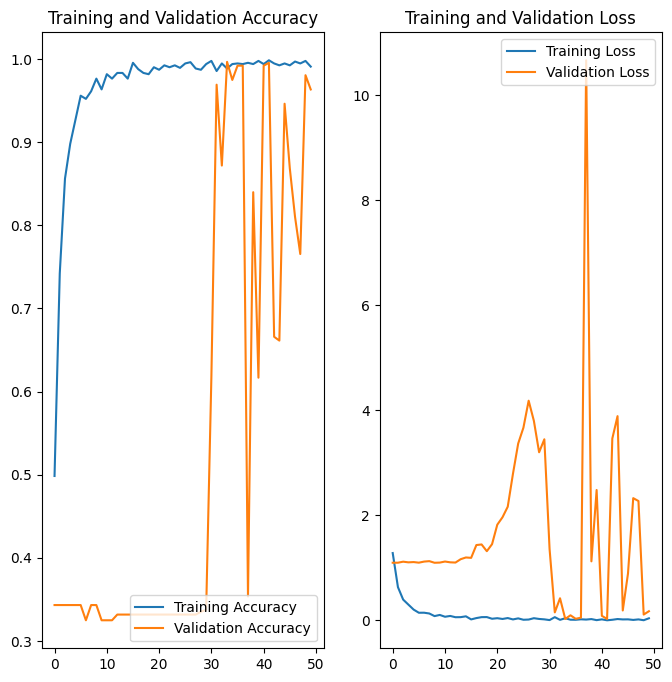

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
end_time = time.time()
selang_waktu = end_time - start_time
seconds2string(selang_waktu)

'28 minutes 41 seconds'

# Testing Image

Saving raSxG3GjqMrYHvgW.png to raSxG3GjqMrYHvgW.png
1/1 [==============================] - 1s 937ms/step
raSxG3GjqMrYHvgW.png
[[1. 0. 0.]]
paper


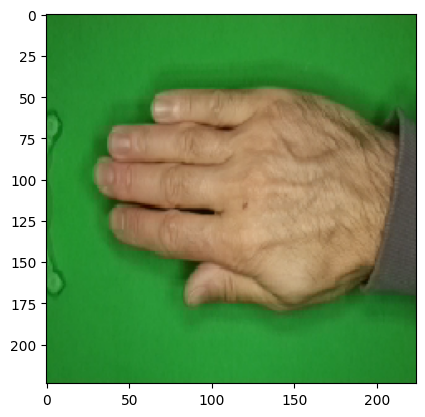

In [16]:
nama_class = validation_generator.class_indices
nama_class = dict([(value, key) for key, value in nama_class.items()])

unggah = files.upload()

for fn in unggah.keys():
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(img_height, img_width))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model_mobilenetv2.predict(images, batch_size=32)
  pembanding = np.array([i for sublisted in classes for i in sublisted])
  pembanding = np.argmax(pembanding)
  print(fn)
  print(classes)
  print(nama_class[pembanding])

In [17]:
model_mobilenetv2.save('model_mobilenetv2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
